# Projet : Gravitation et orbites


![Image d'un planétaire, par Birmingham Museums Trust](orrery.jpg)

Dans ce projet, vous allez étudier la physique des orbites des planètes, dont des exoplanètes. À l'échelle du système solaire, le comportement des corps célestes se décrit, à une très bonne approximation, par les lois de Newton (chapitre 2, section 3 des notes de cours) et par la force gravitationnelle (chapitre 2, section 8.1 des NoC). Avec cette liste courte de principes et d'équations, on peut, en principe, décrire avec précision l'évolution temporelle du système -- c'est-à-dire, les orbites des planètes. Cependant, des résolutions analytiques des systèmes à plusieurs corps s'avèrent difficiles, voire impossibles. On a recours, donc, à une résolution numérique.

Les compétences à acquérir sont les suivantes :

+ La physique des forces, la gravitation, les lois de Newton.
+ La manipulation des vecteurs.
+ Les changements d'unités.
+ L'analyse des données, l'ajustement d'un modèle linéaire aux données.
+ La résolution d'un problème par la méthode numérique d'itération.
+ Une compréhension des limites de la méthode, et comment évaluer son domaine de validité.

---

# 0. Outils de base : dessiner des points

Pour rappel : vous avez utilisé `matplotlib` lors des TP. Voici un exemple trivial de comment dessiner un nuage de points (en anglais, un _scatter plot_) :

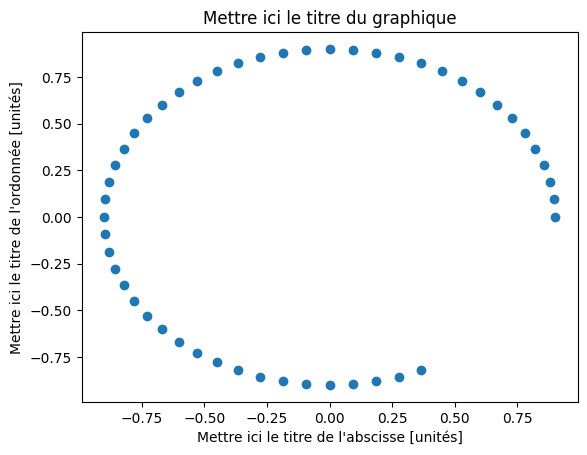

L'option 'scaled' permet d'homogénéiser les axes.


In [19]:

import matplotlib.pyplot
import math
import numpy as np
matplotlib.pyplot.ion()
nPointsNuage = 50
tmpX = np.zeros(nPointsNuage) # un array ; on pourrait également utiliser une liste
tmpY = np.zeros(nPointsNuage)
for i in range(0,nPointsNuage):
    theta = i * (2.0 * math.pi / 60.0)
    r = 0.9
    x = r * math.cos(theta)
    y = r * math.sin(theta)
    tmpX[i] = x
    tmpY[i] = y
matplotlib.pyplot.scatter(tmpX, tmpY)
matplotlib.pyplot.title("Mettre ici le titre du graphique")
matplotlib.pyplot.xlabel("Mettre ici le titre de l'abscisse [unités]")
matplotlib.pyplot.ylabel("Mettre ici le titre de l'ordonnée [unités]")
#matplotlib.pyplot.axis('scaled')
matplotlib.pyplot.show()
print("L'option 'scaled' permet d'homogénéiser les axes.")

---

# 1. Introduction : Les exoplanetes, et la troisième loi de Kepler

L'astronome Kepler a identifié trois lois décrivant les orbites des planètes autour d'un astre, dont la troisième est la suivante :

3) La carré de la période sidérale $P$ d'une planète (le temps entre deux passages suffessifs devant une étoile lointaine) est directement proportionnel au cube du demi-grand axe $a$ de la trajectoire elliptique de la planète :

$$\left( \frac{2\pi}{P} \right)^2 \, a^3 = k$$
où

* $P$ est la période de révolution (techniquement, la période sidérale) de la planète (en anglais : _orbital period_),
* $a$ est le demi-grand axe de la trajectoire elliptique de la planète (en anglais : _semi-major axis of the orbit_),
* $k$ est une constante.

Newton a montré que la constante $k$ est donnée par la formule suivante :

$$k = \mathcal{G} (M+m) \approx \mathcal{G} M$$
où

+ $m$ est la masse de la planète,
+ $M$ est la masse de l'astre,
+ $\mathcal{G}$ est la constante gravitationnelle, $\mathcal{G} = 6,674 \times 10^{-11} \, \mathrm{m}^3 \, \mathrm{kg}^{-1} \, \mathrm{s}^{-2}$

L'approximation $\mathcal{G}(M+m) \approx \mathcal{G}M$ est valable dans la limite où la masse de l'astre est grande devant celle de la planète. Dans cette limite, la valeur de $k$ est identique pour toutes les planètes d'un système solaire.

Kepler étudiait notre système solaire, mais ses lois doivent s'appliquer plus largement.
La NASA a rassemblé [une base de données d'observations d'exoplanètes](https://exoplanetarchive.ipac.caltech.edu/cgi-bin/TblView/nph-tblView?app=ExoTbls&config=PS),
c'est-à-dire des planètes se situant dans des systèmes solaires autres que le nôtre.
Dans le fichier ```nasa-exoplanetes.csv```, vous trouverez une fraction de ces données, dans un format adapté à la lecture par un code python.
Les données se regroupent sous la forme de quatre colonnes et plusieurs rangées (lignes).
Ces quatres colonnes représentent :

1. la période de l'orbite de la planète, $P$, en jours ;
2. le demi-[grand axe](https://fr.wikipedia.org/wiki/Grand_axe) de la trajectoire, $a$, en au ([unités astronomique](https://fr.wikipedia.org/wiki/Unit%C3%A9_astronomique)) ;
3. la masse de la planète, $m$, en unités de [masses terrestres](https://fr.wikipedia.org/wiki/Masse_terrestre_(unit%C3%A9)) (1 $M_T$ = la masse de la Terre) ;
4. la masse de l'astre, $M$, en unités de [masses solaires](https://fr.wikipedia.org/wiki/Masse_solaire) (1 $M_S$ = la masse du Soleil).

Dans cette première partie, nous allons lire et étudier ces données afin de tester la théorie de Kepler.

### Étape 1 : lecture du fichier

[Q1] En utilisant ```numpy```, lire le contenu du fichier CSV et stocker le dans un tableau (array) bidimensionnel que vous appelerez `fiche`.
(Par exemple, la méthode ```numpy.loadtxt()``` permettrait d'obtenir un tel tableau.)

In [20]:
#import numpy as np
#fich = np.𝚕𝚘𝚊𝚍𝚝𝚡𝚝('nasa-exoplanetes.csv',𝚍𝚎𝚕𝚒𝚖𝚒𝚝𝚎𝚛=",")
#print (fich[:,0])

In [21]:
import numpy

fich = numpy.loadtxt("nasa-exoplanetes.csv", delimiter=',')
#print(fiche)
print(fich[0,:])

[3.2603e+02 1.2900e+00 6.1656e+03 2.7000e+00]


### Étape 2 : calcul

Ensuite, nous allons traiter les données, une ligne à la fois.
Pour ce faire, il vous faudra une boucle `for`.
**Pour chaque planète** (chaque ligne du tableau) :

+ [Q2] Extraire les paramètres $P$, $a$, $m$, et $M$.
+ [Q3] Calculer la valeur de $f = \frac{a^3}{P^2 M}$ et imprimer sa valeur sous une forme semblable à la suivante :
```La valeur de f de la [...]ième planète est [...] au^3 jour^-2 MS^-1```
(où vous remplacerez les ```[...]``` par des chiffres). Stocker cette valeur dans un array (ou une liste) `valeursKeplerF`.

[Q4] Que constatez-vous ?

[Q5] Calculer la moyenne et l'écart-type de l'ensemble de vos valeurs de $f$
(en utilisant ```numpy.mean()``` et ```numpy.std()``` ou autrement).


In [22]:
P = fich[:,0]
a = fich[:,1]
m = fich[:,2]
M = fich[:,3]
print (P)
print(a)
print(m)
print(M)
# Q 3
f = a**3 /(P**2 *M)
print(f)
valeurkeplerX =[]
valeurkeplerY =[]
for i in range(0, 17):
    print("la valeur de f de la", i+1, "eme planete est",f[i]," au ^3 jour^-2 MS^_1")
    x = P[i] ** 2 * M[i]
    y = a[i]** 3
    valeurkeplerX.append(x)
    valeurkeplerY.append(y)
#Q4
print ("on constate que les valeurs sont similaires et quasiment égales a 0")
# Q5
moyenne = np.mean(f)
print ("la moyenne est", moyenne)
ecarttype = np.std(f)
print("l'écart-type est", ecarttype)


[ 326.03      516.22      185.84     1766.41      799.45      993.3
   30.3506    452.8       883.        416.        335.1       269.3
  479.1      1076.6      2287.          4.230785   14.6516     44.38    ]
[1.29   1.54   0.83   2.83   1.676  2.6    0.19   1.333  2.08   0.92
 0.995  0.87   1.19   2.059  3.404  0.0527 0.1134 0.237 ]
[6165.6     3337.07    1525.5     1541.46777  556.83537 3273.5
  289.2253   632.46     273.32     603.877   3140.03    2256.5
 1233.13     774.86566  157.96072  150.009    255.4       52.44   ]
[2.7  1.8  2.2  0.97 0.98 2.3  0.99 1.54 1.54 0.48 1.16 1.23 0.98 1.01
 1.01 1.03 0.91 0.9 ]
[7.47980436e-06 7.61412504e-06 7.52546262e-06 7.48866741e-06
 7.51646005e-06 7.74517682e-06 7.52126769e-06 7.50165161e-06
 7.49458996e-06 9.37422954e-06 7.56244793e-06 7.38210027e-06
 7.49139103e-06 7.45656684e-06 7.46646358e-06 7.93876066e-06
 7.46496308e-06 7.50979242e-06]
la valeur de f de la 1 eme planete est 7.479804361237443e-06  au ^3 jour^-2 MS^_1
la valeur de f de 

### Étape 3 : graphique

Il convient de visualiser des données sous forme d'un graphique.

[Q6] Modifier votre code pour qu'il calcule et stocke en plus, pour chaque ligne,

+ les abscisses $x = P^2 M$ (stockées dans un array/liste `valeursKeplerX`),
+ les ordonnées $y = a^3$ (stockées dans un array/liste `valeursKeplerY`).

et puis tracer un nuage de points (en utilisant ```matplotlib.pyplot.scatter()``` ou autrement). N'oubliez pas d'ajouter un titre et nommer vos axes (avec les bonnes unités).

### Étape 4 : ajustement et interpretation

[Q7] Effectuer un ajustement linéaire aux données (avec ```numpy.polyfit()``` ou autrement),
et ajouter la fonction ajustée au graphique.

* [Q8] Commenter l'ajustement. (Les données, sont-elles cohérentes avec la fonction ?)
* [Q9] Que vaut le coefficient directeur de la droite ? Est-il cohérent avec la moyenne calculée précédemment ? Est-il cohérent avec la théorie ? (Astuce : faites attention aux unités. Combien de mètres vaut 1au (une unité astronomique) ? Combien de s vaut un jour ? Combien de kg vaut la masse solaire $M_S$ ?)
* [Q10] Selon la loi de Kepler, la droite passe par l'origine. Est-ce bien le cas ? (L'ordonnée à l'origine, est-elle cohérente avec zéro ?)

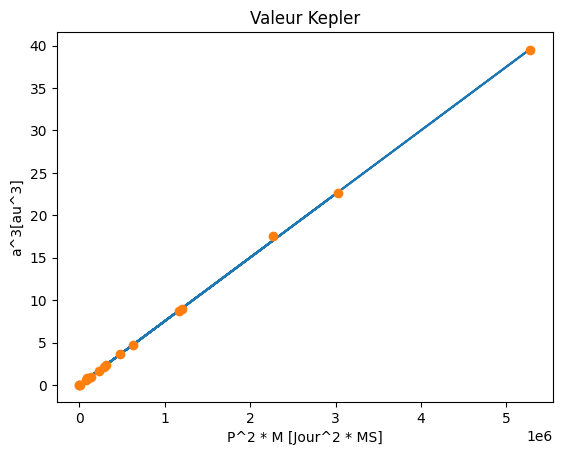

In [23]:
import matplotlib.pyplot as plt
import numpy as np
p = np.polyfit(valeurkeplerX, valeurkeplerY,1)
x = np.linspace(0, 10, 20)
plt.plot(valeurkeplerX, p[0]*np.array(valeurkeplerX) + p[1],"-")
plt.plot(valeurkeplerX,valeurkeplerY,"o")
plt.title("Valeur Kepler")
plt.xlabel("P^2 * M [Jour^2 * MS]")
plt.ylabel("a^3[au^3]")
p = np.polyfit(valeurkeplerX, valeurkeplerY,1)
plt.show()


In [24]:
# Q8
print("On remarque que la droite passe par tous les points x donc elle est bien en accord avec les données")
print()
# Q9
print(" le coefficient directeur de la droite vaut", p[0], " il correspond très bien à la moyenne calculée qui vaut ", moyenne, "car la difference entre les 2 valeurs est minime")
o = p[0]* (((149597870700**3)* 4*(np.pi)**2)/(86400**2 * 1.989*10**30)) # on a G = a^3 * 4*pi^2 / (P^2)*M  car k = GM
# 1 au = 14957870700 m / 1jour = 86400 s / Ms= 1.989 * 10 ^30 kg donc on convertissant les unites on a l'expression ci-haut
G = 6.674*10 **(-11)
print()
print("on remarque que a valeur de G =", G, " est bien en accord avec le calcul qui nous donne", o,"car la différence entre les 2 valeurs est négligeable")
print("Donc la théorie de kepler est vérifiée" )
# Q10
print()
print("oui la droite passe par l'origine ce qui vérifie bien la loi de Kepler ")

On remarque que la droite passe par tous les points x donc elle est bien en accord avec les données

 le coefficient directeur de la droite vaut 7.492240581401235e-06  il correspond très bien à la moyenne calculée qui vaut  7.640773383919017e-06 car la difference entre les 2 valeurs est minime

on remarque que a valeur de G = 6.674e-11  est bien en accord avec le calcul qui nous donne 6.669379330105736e-11 car la différence entre les 2 valeurs est négligeable
Donc la théorie de kepler est vérifiée

oui la droite passe par l'origine ce qui vérifie bien la loi de Kepler 


---

# 2. Modélisation simple d'un système simple

## 2.1 : Introduction

Rappelons la loi de Newton (le principe fondamental de la dynamique):

$$m_{\mathrm{tot}} \frac{\mathrm{d}\vec{v}_C}{\mathrm{d}t} = \vec{F}_{\mathrm{tot}}$$
où

+ $m_{\mathrm{tot}}$ est la masse totale d'un système,  
+ $\vec{v}_C$ est la vitesse (vectorielle) du centre de masse $C$ du système, et  
+ $\vec{F}_{\mathrm{tot}}$ est la résultante des forces extérieures qui s'appliquent sur le système.

Rappelons également comment calculer la force gravitationnelle entre deux corps :

$$\vec{F}_{A\to B} = -\mathcal{G} \frac{m_A m_B}{||\vec{AB}||^2} \vec{u}_{AB}$$
où

+ $\vec{F}_{A\to B}$ est la force exercé par un corps (ou un système d'objets) $A$ de masse $m_A$ sur un corps $B$ de masse $m_B$,  
+ $\vec{AB}$ est la distance vectorielle entre les centres de masse des deux corps,  
+ $\mathcal{G}$ est la constante gravitationnelle,  et
+ $\vec{u}_{AB}$ est le vecteur unitaire de la distance entre les deux corps :
$$\vec{u}_{AB} = \frac{\vec{AB}}{||\vec{AB}||}$$

Nous allons mettre en oeuvre une résolution numérique de ces équations.
Nous étudierons d'abord des systèmes suffisamment simples qu'ils permettent
aussi des résolutions _analytiques_. L'intérêt est de comparer les deux approches
afin de valider l'approche numérique et de comprendre ses limites.

## 2.2 : Outils de base : comment calculer la distance et la force entre deux corps

Un vecteur en trois dimensions, par exemple la vitesse du corps $A$, peut se représenter sous la forme de trois nombres. Plusieurs conventions sont possibles : [coordonnées cartésiennes](https://fr.wikipedia.org/wiki/Coordonn%C3%A9es_cart%C3%A9siennes) $\vec{x} = (x,y,z)$, [coordonnées sphériques](https://fr.wikipedia.org/wiki/Coordonn%C3%A9es_sph%C3%A9riques) (r,$\theta$,$\phi$), et d'autres. En principe, on peut choisir librement son système de coordonnées, car ce choix n'a pas de conséquences physiques. Par contre, certains choix peuvent entrainer des calculs beaucoup plus complexes que d'autres, et pour cette raison nous utiliserons exclusivement des coordonnées cartésiennes dans ce projet.

De même, on peut choisir librement certaines propriétés de son système de coordonnées : par exemple, l'orientation des axes, où se situe l'origine, et même un déplacement ou une rotation globale du système. Cependant, un mauvais choix peut amener à des complexités inutiles. Pour cette raison, nous choisirons des origines naturelles et appropriées au problème. (Par exemple, pour étudier les orbites des planètes autour du Soleil, on choisirait comme origine un point proche du centre du système solaire, et non le centre d'une galaxie lointaine.)

En plus de sa représentation mathématique, en Python nous pouvons représenter un vecteur sous plusieurs formes : trois nombres indépendents, un objet de type `list`, un objet de type `numpy.array`, et d'autres. Pour assurer l'autocohérence, nous utilserons des objets `numpy.array`.

Nous aurons besoin, à plusieurs reprises, de calculer la distance vectorielle (vecteur déplacement) entre deux points, et d'en déduire sa norme et sa direction. Par exemple, dans la formule de la force gravitationnelle ci-dessous, nous avons vu :

 + le vecteur déplacement $\vec{AB} = \vec{x}_B - \vec{x}_A$ (où $\vec{x}_B = \vec{OB}$ est la position du corps B, et $\vec{x}_A = \vec{OA}$ est la position du corps A) ;
 + sa magnitude $||\vec{AB}||$, un scalaire ;
 + sa direction $\vec{u}_{AB}$, un vecteur unitaire.
 
Grâce à `numpy.array`, ces opérations sont simples à réaliser. Par exemple :

In [25]:
import numpy

# Nous définissons deux vecteurs, qui répresentent des positions de deux objets :
exempleVecA = numpy.array([0.0, 0.0, 1.0]) # en mètres (les objets ne sont pas des planètes !)
exempleVecB = numpy.array([0.0, 2.0, 1.0]) # en mètres

# Nous calculons la différence entre les deux vecteurs, qui répresente le vecteur déplacement entre les objets :
exempleVecDiff = exempleVecB - exempleVecA # en mètres

# Nous calculons le produit scalaire de cette différence avec elle-même, c'est-à-dire la magnitude au carré :
exempleVecDiffMagCarre = exempleVecDiff.dot(exempleVecDiff) # en m^2

# ... et nous en déduisons la magnitude :
import math
exempleVecDiffMag = math.sqrt(exempleVecDiffMagCarre) # en mètres

# Enfin, nous divisons le vecteur différence par sa magnitude, et nous en déduisons le vecteur unitaire associé :
exempleVecDiffUnitaire = exempleVecDiff / exempleVecDiffMag # sans unités

print("Voici la position du corps A : ", exempleVecA, "m")
print("Voici la position du corps B : ", exempleVecB, "m")
print("Voici le vecteur déplacement entre A et B : ", exempleVecDiff, "m")
print("  Sa magnitude est ", exempleVecDiffMag, "m, et son vecteur unitaire est ", exempleVecDiffUnitaire)



Voici la position du corps A :  [0. 0. 1.] m
Voici la position du corps B :  [0. 2. 1.] m
Voici le vecteur déplacement entre A et B :  [0. 2. 0.] m
  Sa magnitude est  2.0 m, et son vecteur unitaire est  [0. 1. 0.]


### Exercice : calculer la force

[Q11] Muni de ces outils, écrire une fonction python `forceGravitationnelle(xA, xB, mA, mB)` qui calcule la force vectorielle entre deux corps A et B, dont les positions sont `xA` et `xB`, et dont les masses sont `mA` et `mB`. On reprend la formule :

$$\vec{F}_{A\to B} = -\mathcal{G} \frac{m_A m_B}{||\vec{AB}||^2} \vec{u}_{AB}$$

Vous pouvez utiliser la trame suivante :

```python
def ForceGravitationnelle(xA, xB, mA, mB):
    G = 6.674*10**(-11)
    exempleVecDiff = xB - xA 
    exempleVecDiffMagCarre = exempleVecDiff.dot(exempleVecDiff)
    exempleVecDiffMag = math.sqrt(exempleVecDiffMagCarre)
    exempleVecDiffUnitaire = exempleVecDiff / exempleVecDiffMag
    F = (G*mA*mB/exempleVecDiffMagCarre)*exempleVecDiffUnitaire
    return F
```

In [26]:
def ForceGravitationnelle(xA, xB, mA, mB):
    G = 6.674*10**(-11)
    exempleVecDiff = xB - xA
    exempleVecDiffMagCarre = exempleVecDiff.dot(exempleVecDiff)
    exempleVecDiffMag = math.sqrt(exempleVecDiffMagCarre)
    exempleVecDiffUnitaire = exempleVecDiff / exempleVecDiffMag
    F = (-G*mA*mB/exempleVecDiffMagCarre)*exempleVecDiffUnitaire
   
    return F


Il est une bonne pratique de tester et de vérifier le code que l'on vient d'écrire. Par exemple, dans l'exemple ci-dessus, on définit deux objets séparés d'une distance de deux mètres dans la direction $+y$. Soient leurs masses 1kg. On sait, donc, que la norme de la force est

$$\mathcal{G} \frac{m_A m_B}{||\vec{AB}||^2} = \left( 6,674 \times 10^{-11} \, \mathrm{m}^3 \, \mathrm{kg}^{-1} \, \mathrm{s}^{-2} \right) \times \frac{1 \, \mathrm{kg}^2}{4 \, \mathrm{m}^2} = 1,6685 \times 10^{-11} \, \mathrm{kg} \, \mathrm{m} \, \mathrm{s}^{-2}$$

Et l'orientation ? $\vec{F}_{A\to B}$ est la force exercé par A sur B, c'est-à-dire la force subit par B ; la force gravitationnelle étant attractive, elle va diriger B vers A, donc dans la direction $-y$, c'est-à-dire $(0, -1, 0)$. Est-ce bien le cas ? Le code ci-dessous effectuera ce test (après que vous avez défini la fonction `forceGravitationelle`) :

```python
exempleForce = forceGravitationnelle(exempleVecA, exempleVecB, 1.0, 1.0)
exempleForceMagnitude = math.sqrt(exempleForce.dot(exempleForce))
print("La force est", exempleForce, "kg m s^{-2}. Sa magnitude vaut ", exempleForceMagnitude, "kg m s^{-2}, et son vecteur unitaire est", exempleForce/exempleForceMagnitude)
```

In [27]:
exempleForce = ForceGravitationnelle(exempleVecA, exempleVecB, 1.0, 1.0)
exempleForceMagnitude = math.sqrt(exempleForce.dot(exempleForce))
print("La force est", exempleForce, "kg m s^{-2}. Sa magnitude vaut ", exempleForceMagnitude, "kg m s^{-2}, et son vecteur unitaire est", exempleForce/exempleForceMagnitude)

La force est [-0.0000e+00 -1.6685e-11 -0.0000e+00] kg m s^{-2}. Sa magnitude vaut  1.6685e-11 kg m s^{-2}, et son vecteur unitaire est [-0. -1. -0.]


[Q12] Ajouter ces lignes de code et effectuer ce test. Si tout est correct, le résultat de ce test simple devrait se ressembler à la suivante :

```
La force est [-0.0000e+00 -1.6685e-11 -0.0000e+00] kg m s^{-2}. Sa magnitude vaut  1.6685e-11 kg m s^{-2}, et son vecteur unitaire est [-0. -1. -0.]
```

## 2.3 : Premier jet : un champ gravitationnel statique

On considère un système constitué du Soleil (corps A) et de la Terre (corps B).
Nous souhaitons modéliser le trajet de la Terre autour du Soleil.
Dans ce premier exercice, le Soleil est supposé fixe et immobile à l'origine.

La masse du Soleil vaut $1,9885 \times 10^{30} \, \mathrm{kg}$.
La masse de la Terre vaut $5,972 \times 10^{24} \, \mathrm{kg}$.

### Exercice : calculer la force subit par la Terre

À t=0 (c'est-à-dire dans les conditions initialles), la Terre se trouve à une distance 
$d_0 = 149 \, 596 \, 006 \, \mathrm{km}$
du Soleil.
On place la Terre à $x_B = (d_0, 0, 0)$. Le soleil est forcément à $x_A = (0,0,0)$.

[Q13] Utiliser votre fonction `forceGravitationnelle` pour évaluer la force gravitationnelle (vectorielle) subie par la Terre à cet instant, en unités SI.

[Q14] Ensuite, faites le calcul vous-même (sur papier, ou avec une calculatrice) et vérifiez que vos deux valeurs sont cohérentes.

In [28]:
# Q13
d0=149596006000.0 # en metres
exempleVecDiff = numpy.array([d0, 0.,0.]) - numpy.array([0., 0., 0.])
print(exempleVecDiff)
print(ForceGravitationnelle(numpy.array([0., 0., 0.]), numpy.array([d0, 0.,0.]), 1.985*10**30, 5.972*10**24))
# q14
print("oui le calcul est verifie")

[1.49596006e+11 0.00000000e+00 0.00000000e+00]
[-3.53530197e+22 -0.00000000e+00 -0.00000000e+00]
oui le calcul est verifie


## 2.4 : L'évolution du système

Mais la Terre ne va pas rester à cette position initiale : elle se déplace ! Comment calculer son trajet ? Il est possible de trouver une solution analytique, mais nous suivrons plutôt une approche numérique itérative. Nous faisons une série de calculs par pas de temps $dt$. Nous supposons connues les positions et vitesses du système au temps initial $t=t_0$. Munis de ces informations, nous pouvons calculer les forces exercées, et les accélerations résultantes. Elles permettent de calculer les positions et les vitesses des objets un petit moment plus tard, à $t = t_0 + dt$. Sachant ces nouvelles valeurs, nous pouvons mettre à jour nos calculs des forces et des accélerations, et ensuite nous recalculerons les positions et les vitesses à $t = t_0 + 2dt$. Nous continuerons à répéter ces étapes en boucle, et ainsi nous pourrons calculer l'état du système à tout temps ultérieur. L'approche pourrait vous rappeler les mots de Laplace :

> « Une intelligence qui, à un instant donné, connaîtrait toutes les forces dont la nature est animée et la situation respective des êtres qui la composent, si d’ailleurs elle était suffisamment vaste pour soumettre ces données à l’analyse, embrasserait dans la même formule les mouvements des plus grands corps de l’univers et ceux du plus léger atome ; rien ne serait incertain pour elle, et l’avenir, comme le passé, serait présent à ses yeux.»

Mais comment mettre en oeuvre cette approche ?

Supposons que le pas $dt$ soit suffisamment court pour que la réponse du système soit linéaire, c'est-à-dire

$$\vec{x}_B(t + dt) = \vec{x}_B(t) + d\vec{x} = \vec{x}_B(t) + \vec{v}_B(t) dt$$
$$\vec{v}_B(t + dt) = \vec{v}_B(t) + d\vec{v} = \vec{v}_B(t) + \vec{a}_B(t) dt$$

où $\vec{x}_B(t)$ est la position de la Terre au temps $t$, $\vec{v}_B(t)$ est sa vitesse, et $\vec{a}_B(t)$ est son accéleration. Noter que ces expressions ne sont pas exactes, parce qu'en réalité $\vec{v}_A$ et $\vec{a}_A$ évoluent pendant de l'intervalle $(t, t+dt)$... mais si $dt$ est très court, les paramètres sont presque constants et l'approximation est bonne. (Dans la limite $dt \to 0$, on recouvre le calcul différentiel et les expressions deviennent exactes.)

Alors, on procède comme suite :

- On définie les conditions initiales : les valeurs des paramètres $\vec{x}_B(t)$ et $\vec{v}_B(t)$ à $t=0$.
- On calcule $\vec{F}_{A\to B}(t)$ et ainsi $\vec{a}_B(t)$ à $t=0$.
- On calcule les paramètres à $dt$ : $\vec{x}_B(dt)$ et $\vec{v}_B(dt)$.
- Avec ces nouvelles valeurs à $dt$, on calcule les paramètres à $2dt$.
- Avec ces nouvelles valeurs à $2dt$, on calcule les paramètres à $3dt$.
- (etc)
 
Ceci est une approche itérative. Parce que nous allons refaire les calculs de nombreuses fois, nous aimerions écrire un bloc de code réutilisable dans des boucles.

### Exercice : avancer un pas

[Q15] Écrire une fonction `champStatiqueAvanceUnPas(xA, xB, vB, dt)` qui fait avancer la position et la vitesse de la Terre d'un pas, et renvoie les nouvelles valeurs.
(Dans ce modèle simplifié, le Soleil reste fixe à l'origine. Parce qu'il ne bouge pas, nous ne précisons pas sa vitesse.)
Vous pouvez utiliser la trame suivante :

```
def champStatiqueAvanceUnPas(xA, xB, vB, dt):
    # votre code ici
    nouvelle_xB = [...]
    nouvelle_vB = [...]
    return nouvelle_xB, nouvelle_vB
```

Point technique : Python traite des nombres simples (comme `dt`) un peu différemment des objets composés (comme `xB`). Selon la structure de votre code, vous pourriez avoir besoin de créer une nouvelle copie d'un vecteur avant de le manipuler, par exemple :

```
    dxB = dt * numpy.array(vB)
````

[Q16] Ensuite, tester la fonction. Par exemple, avec une vitesse initiale de **29,78 km/s** vers $+y$ et un pas de 1s, on attend que la Terre se déplace d'environ 30km vers $+y$ lors du pas, et que sa vitesse évolue vers le Soleil (vers $-x$) ; vous trouverez un bloc de code adapté ci-dessous. Ajouter ce test et vérifier qu'il donne un résultat raisonnable.

```
tmp_xA = exempleChampStatique_Soleil_x
tmp_xB = exempleChampStatique_Terre_x
tmp_vB = (0.0, 1.0, 0.0)
tmp_dt = 1.0
print("Avant : xB = ", tmp_xB, " ; vB = ", tmp_vB)
tmp_xB, tmp_vB = champStatiqueAvanceUnPas(tmp_xA, tmp_xB, tmp_vB, tmp_dt)
print("Après : xB = ", tmp_xB, " ; vB = ", tmp_vB)
```
 

In [29]:
def champStatiqueAvanceUnPas(xA, xB, vB, dt):
    # votre code ici
    dxB = dt * numpy.array(vB)
    nouvelle_xB = xB + dxB
    aB = (ForceGravitationnelle(xA, xB, 1.9885*10**30, 5.972*10**24))/(5.972*10**24)
    #print(aB)
    dvB = dt * numpy.array(aB)
    nouvelle_vB = vB + dvB
    return nouvelle_xB, nouvelle_vB
mterre = 5.972*10**24
msoleil = 1.9885*10**30

In [30]:
tmp_xA =numpy.array([0, 0, 0])
tmp_xB = numpy.array([d0, 0, 0])
tmp_vB =numpy.array([0.0, 29780, 0.0])
tmp_dt = 1.0
print("Avant : xB = ", tmp_xB, " ; vB = ", tmp_vB)
tmp_xB, tmp_vB = champStatiqueAvanceUnPas(tmp_xA, tmp_xB, tmp_vB, tmp_dt)
print("Après : xB = ", tmp_xB, " ; vB = ", tmp_vB)
# ceci est en accord avec les donnees de la Q16

Avant : xB =  [1.49596006e+11 0.00000000e+00 0.00000000e+00]  ; vB =  [    0. 29780.     0.]
Après : xB =  [1.49596006e+11 2.97800000e+04 0.00000000e+00]  ; vB =  [-5.93023359e-03  2.97800000e+04  0.00000000e+00]


## 2.5 : Point sur le choix du pas

Le pas ($dt$) n'est pas un paramètre physique : il ne correspond pas à une propriété observable du système solaire. En principe, on devrait trouver des résultats semblables pour tout choix _valable_ de dt (c'est-à-dire, pour tout choix qui valide l'hypothèse que l'évolution du système est linéaire pendant l'intervalle $dt$). Cependant, il est un paramètre de notre modèle, et un mauvais choix du pas peut fausser le résultat. Par exemple, nous savons que la période de l'orbite de la Terre autour du Soleil est un an. Un pas de six mois serait beaucoup trop grossier, car le trajet de la Terre montre une courbure importante à cette échelle. (La Terre part vers $+y$, mais après six mois elle aura fait demi-tour et se dirige vers $-y$ à l'autre côté du Soleil.) En général, on veut que le pas soit le plus court possible.

Mais la précision a son prix : plus $dt$ est petit, plus le temps de calcul augmente. Par exemple, supposons qu'on souhaite suivre l'orbite de la Terre pendant un an. Un pas d'un jour nécessiterait environ 365 appels à la fonction `champStatiqueAvanceUnPas` ; un pas d'une heure nécessiterait environ 9000 appels ; et un pas d'une seconde, environ 30 million appels. Aujourd'hui les ordinateurs sont puissants et des millions de calculs ne posent pas forcément un problème, mais il y a des limites ; un pas d'un nanoseconde, par exemple, serait inapproprié. (Parfois on rencontre d'autres limites, comme la consommation de mémoire vive si on stocke la position de la Terre après chaque pas.) Un pas très, très petit peut aussi engendrer des problèmes de précision numérique. Dans ce projet, vous devrez choisir un pas adapté au problème, et étudier l'effet de la variation de sa valeur.


#### Exercice : L'orbite de la terre

On va maintentant suivre la Terre autour du Soleil. On prend des valeurs initiales suivantes : 

$$\vec{x}(t=0) = (d_0, 0, 0)$$
$$\vec{v}(t=0) = (0, v_0, 0)$$
où
$$d_0 = 149 \, 596 \, 006 \, \mathrm{km}$$
$$v_0 = 29,78 \, \mathrm{km} \, \mathrm{s}^{-1}$$

[Q17] Choisir un pas $dt$, et déterminer le nombre $N$ de pas correspondent à un an (environ 365.25 jours). Ensuite, utilisez la fonction `champStatiqueAvanceUnPas()` $N$ fois et déterminer la position de la Terre après un an. Pour ceci, vous souhaiterez utiliser une boucle `for`. 

[Q18] Visualiser l'évolution temporelle de la position de la Terre.
 * Remarques : Il est convenable de pouvour visualiser ce que fait le calcul. À cette fin, vous pouvez utiliser la fonction `scatter()` de `matplotlib.pyplot`. Astuce : faites attention à ne pas surcharger le graphique. Par exemple, si vous essayez d'y ajouter un point par seconde (environ $3\times 10^7$ points au total), vous dépasserez sans doute des limites de ressources. Au lieu de dessiner un point par pas, vous pourriez dessiner un point par 1000 pas (ou 100, ou $10^4$, ou etc, en fonction de sa durée) ; [l'opération modulo](https://fr.wikipedia.org/wiki/Modulo_(op%C3%A9ration)) (`%`, le reste de la division d'entiers) pourrait vous aider. Vous pouvez ainsi utiliser un pas court sans stocker un nombre excessif de points.

Questions à considérer, muni de votre outil de simulation numérique :

+ [Q19] Est-ce que la Terre est revenue à son point de départ après un an ? (À quelle précision ?)
+ [Q20] Que se passe-t-il si le pas $dt$ varie ? (Vous pouvez tenter, par exemple, {10000s, 1000s, 100s, 10s, 1s} ou {1jour, 1heure, 1min, 1s}. Attention, le calcul pourrait devenir long dans le cas d'un pas court.)
+ [Q21] Que se passe-t-il après plusieurs cycles, par exemple au fil de 10 ans, ou de 100 ans ?
 
[Astuce : faites attention aux unités !]

Veuillez utiliser les noms suivants des variables :

+ `xSoleil` : la position du Soleil (c'est un vecteur fixe à l'origine)
+ `xTerre` : la position de la Terre (c'est un vecteur)
+ `vTerre` : la vitesse de la Terre (c'est un vecteur)
+ `dt` : le pas (c'est un nombre)

la position de la terre est [1.49632328e+11 5.83354613e+08 0.00000000e+00] km


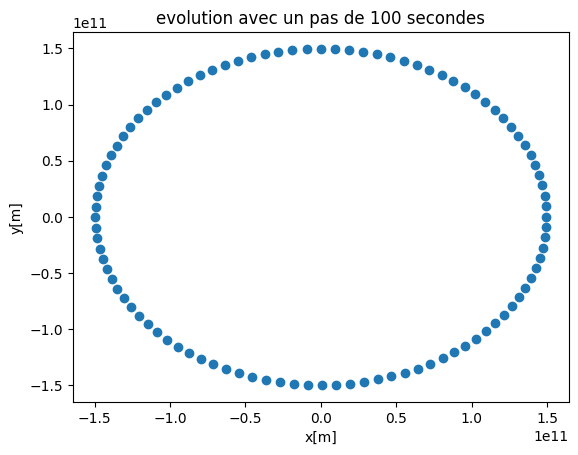

In [31]:
#question 18

#  un an est forme de 1 * 365.25 * 60 * 24 * 3600 secondes
xSoleil = numpy.array([0.0, 0.0, 0.0])
xTerre = numpy.array([149596006.0*10**3, 0.0, 0.0])
vTerre = (0.0, 29.78*10**3, 0.0)
resx = []
resy = []

dt= 100  #pas choisie 
secans= 365.25*24*3600
N= round(secans/dt) #nombre de fois où la fonction doit se répéter

pointsouhait = 100
pasgraph= round(N/pointsouhait)
for i in range(0,N):
    
    xTerre, vTerre = champStatiqueAvanceUnPas(xSoleil, xTerre, vTerre, dt)
    if i % pasgraph == 0:
        xTerre, vTerre = champStatiqueAvanceUnPas(xSoleil, xTerre, vTerre, dt)
        resx = resx + [xTerre[0]] 
        resy = resy + [xTerre[1]]
print("la position de la terre est", xTerre, "km" )

matplotlib.pyplot.scatter(resx,resy, label="dt = 100s")
matplotlib.pyplot.title("evolution avec un pas de 100 secondes")
matplotlib.pyplot.xlabel("x[m]")
matplotlib.pyplot.ylabel("y[m]")
plt.show()


In [32]:
#Question 19
print("La position est approximativement la même, on note une erreur de 0.01*10**11 qui est negligeable par rapport aux unites de grandeurs")


La position est approximativement la même, on note une erreur de 0.01*10**11 qui est negligeable par rapport aux unites de grandeurs


31557600.0
31558
[1.49596006e+11 0.00000000e+00 0.00000000e+00]
la position de la terre est [ 9.35767290e+10 -1.21403079e+11  0.00000000e+00] km


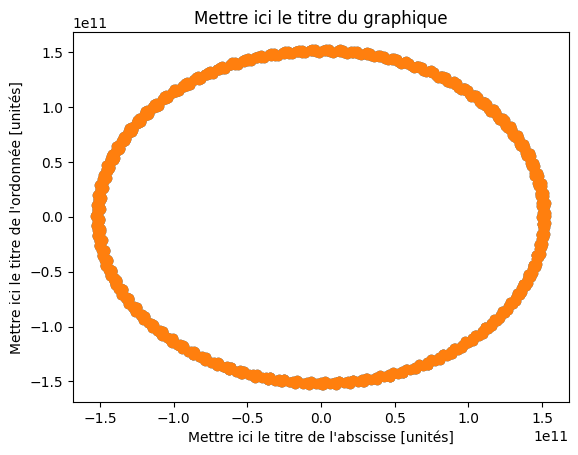

Nous pouvons voir grace au graphique et aux données que la Terre ne revient pas tout à fait à son point de départ.Plus dt sera grand, plus la Terre s'éloigne de son point de départ, cependant sa trajectoire reste une ellipse approximativement confondue avec sa trajectoire initiale


In [33]:

#  un an est forme de 1 * 365.25 * 60 * 24 * 3600 secondes



xSoleil = numpy.array([0.0, 0.0, 0.0])
xTerre = numpy.array([149596006.0*10**3, 0.0, 0.0])
vTerre = (0.0, 29.78*10**3, 0.0)
resx = []
resy = []

dt= 1000 #pas choisie 
secans= 365.25*24*3600
print(secans)
N= round(secans/dt) #nombre de fois où la fonction doit se répéter

pointsouhait = 100
pasgraph= round(N/pointsouhait)
print(N)

print(xTerre)
for i in range(0,10*N):
        xTerre, vTerre = champStatiqueAvanceUnPas(xSoleil, xTerre, vTerre, dt)
        if i % pasgraph == 0:
            xTerre, vTerre = champStatiqueAvanceUnPas(xSoleil, xTerre, vTerre, dt)
            resx = resx + [xTerre[0]] 
            resy = resy + [xTerre[1]]
print("la position de la terre est", xTerre, "km" )

matplotlib.pyplot.scatter(resx,resy, label="dt = 100s")
matplotlib.pyplot.title("Mettre ici le titre du graphique")
matplotlib.pyplot.xlabel("Mettre ici le titre de l'abscisse [unités]")
matplotlib.pyplot.ylabel("Mettre ici le titre de l'ordonnée [unités]")


plt.scatter(resx, resy)
plt.show()
# question 20
print("Nous pouvons voir grace au graphique et aux données que la Terre ne revient pas tout à fait à son point de départ.Plus dt sera grand, plus la Terre s'éloigne de son point de départ, cependant sa trajectoire reste une ellipse approximativement confondue avec sa trajectoire initiale")

In [34]:
#Question 21

print("On remarque que la Terre refait une ellipse (meme trajectoire) et s'éloigne également un peu de sa position initiale")

On remarque que la Terre refait une ellipse (meme trajectoire) et s'éloigne également un peu de sa position initiale


# 3. Un système à deux corps

Dans la réalité, le Soleil n'est pas fixe et immobile. La troisième loi de Newton exige que la force gravitationnelle exercée par le Soleil sur la Terre s'accompagne par une force exercée par la Terre sur le Soleil d'intensité égale, de même direction et de sens opposé. La force subie par le Soleil donne lieu à une acceleration ($2^e$ loi) : le Soleil s'accèlere et se déplacera. Parce que la force subie par la Terre dépend de la position du Soleil, ce déplacement changera l'évolution subséquente du système. Son comportement devient plus complexe : le mouvement de la Terre dépend du mouvement du Soleil, qui dépend du mouvement de la Terre. (Une résolution analytique reste possible dans le cas d'un système à deux corps ; elle s'exprime sous la forme des lois de Kepler.)

Nous adapterons notre simulation numérique pour qu'elle tienne compte du mouvement du Soleil. Pour ce faire, nous retenons la même approche : on définit les conditions initiales, puis on calcule les forces et les accélerations à $t=0$, puis on met à jour les positions et les vitesses, puis on recalcule les forces à $t=dt$, etc. La différence, c'est qu'il faut maintenant suivre davantage de paramètres.

[Q22] D'abord, écrire une fonction `systemeDeuxCorpsAvanceUnPas(xA, xB, vA, vB, dt)` qui fait avancer les positions et les vitesse d'un pas, et renvoie les nouvelles valeurs.
Vous pouvez utiliser la trame suivante :

```python
def systemeDeuxCorpsAvanceUnPas(xA, xB, vA, vB, dt):
    # votre code ici
  
    return nouvelle_xA, nouvelle_vA, nouvelle_xB, nouvelle_vB
```

[Q23] Choisir les valeurs initiales des paramètres pour que le centre de masse (barycentre) du système soit (i) à l'origine, et (ii) au repos, c'est-à-dire de vitesse nulle. (Ces choix n'ont pas de signification physique, dans un sens fondamental, mais ils rendront plus simple le modèle du système.) Comme auparavant, on veut que la distance Terre-Soleil à $t=0$ soit $d_0$ et la vitesse relative à $t=0$ soit $v_0$.
 
[Q24] Ensuite, utiliser cette fonction pour calculer l'évolution du système. 

Veuillez utiliser les noms de variables suivants :

+ `xSoleil` : la position du Soleil (c'est un vecteur)
+ `xTerre` : la position de la Terre (c'est un vecteur)
+ `vSoleil` : la vitesse du Soleil (c'est un vecteur)
+ `vTerre` : la vitesse de la Terre (c'est un vecteur)
+ `dt` : le pas (c'est un nombre)

Questions à considérer :

+ [Q25] Est-ce que le système se comporte différemment du modèle simplifié ci-dessus (d'un Soleil fixe) ? Pourquoi ?
+ [Q26] Est-ce que la position et la vitesse du centre de masse sont censées varier au fil du temps ? Est-ce le cas en pratique, selon votre modèle ?

In [ ]:
#q22
def systemeDeuxCorpsAvanceUnPas(xA, xB, vA, vB, dt):
    dxA = dt*np.array(vA)
    nouvelle_xA = xA + dxA
    dxB = dt * np.array(vB)
    nouvelle_xB = xB + dxB
    aA = ForceGravitationnelle(xB, xA, mterre, msoleil) / msoleil
    aB = ForceGravitationnelle(xA, xB, msoleil, mterre) / mterre
    nouvelle_vA = vA + dt*aA
    nouvelle_vB = vB + dt * aB
    return nouvelle_xA, nouvelle_vA, nouvelle_xB, nouvelle_vB
d0=149596006000.0
# q23
v0 = 29.78*10**3
xsoleilinit= (-mterre*d0)/ (mterre + msoleil)
xterreinit = msoleil*d0 / (mterre + msoleil)
vsoleilinit = (-mterre*v0) / (mterre + msoleil)
vterreinit = (msoleil*v0) / (mterre + msoleil)

#q24

#  un an est forme de 1 * 365.25 * 60 * 24 * 3600 secondes

xSoleil = np.array([xsoleilinit, 0.0, 0.0])
xTerre = numpy.array([xterreinit, 0.0, 0.0])
vTerre = numpy.array([0.0, vterreinit, 0.0])
vSoleil = numpy.array([0.0, vsoleilinit, 0.0])

resxs = []
resys = []
resxt=[]
resyt=[]
dt= 100.0 #pas choisie 
secans= 365.25*24*3600
N= round(secans/dt) #nombre de fois où la fonction doit se répéter

pointsouhait = 100
pasgraph= round(N/pointsouhait)

print("valeur init, xterre =", xTerre, "m" )
for i in range(0,N):
    xSoleil,vSoleil, xTerre, vTerre = systemeDeuxCorpsAvanceUnPas(xSoleil, xTerre, vSoleil, vTerre, dt)
    if i % pasgraph == 0:
        resxt = resxt + [xTerre[0]] 
        resyt = resyt + [xTerre[1]]
        resxs = resxs +[xSoleil[0]]
        resys = resys +[xSoleil[1]]
print("la position de la terre est", xTerre, "km" )

matplotlib.pyplot.scatter(resxs,resys, label="dt = 100s")
matplotlib.pyplot.title("Trajectoire du soleil")
matplotlib.pyplot.xlabel("x en metres")
matplotlib.pyplot.ylabel("y en metres")


plt.scatter(resxs, resys)
plt.show()


valeur init, xterre = [1.49595557e+11 0.00000000e+00 0.00000000e+00] m


---

In [ ]:
plt.scatter(resxt, resyt)
plt.title("Trajectoire de la terre")
plt.xlabel(" x[m]")
plt.ylabel("y[m]")
plt.show()

In [ ]:
# question 25
print("on remarque que la Terre refait une ellipse, cependant le soleil etant mobile en refait une aussi mais avec une echelle plus petite")
# question 26
print('normalement, les positions et vitesses doivent changer mais dans notre cas on peut remarquer que la trajectoire du soleil est extremement negligeable par rapport a la trajectoire de la terre. On peut le considerer en pratique comme fixe. ')
plt.scatter(resxs, resys, label ="Soleil")
plt.scatter(resxt, resyt, label = "Terre")
plt.title("Evolution Terre et Soleil")
plt.xlabel("x[m]")
plt.ylabel("y[m]")
plt.legend()
plt.show()
print("cette figure montre bien les affirmations des questions 20 et 21")